In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

# Used for converting categorical data columns to Numerical
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
for dirname, _, filenames in os.walk('/kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/src/script.ipynb
/kaggle/lib/kaggle/gcp.py
/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv
/kaggle/working/__notebook__.ipynb


## Workflow Steps

1. Data Exploration and Visualization
2. Data Wrangling
3. Making models

### Data Exploration and Visualization

In [3]:
train_df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
datasets = [train_df, test_df]
train_df.head(100)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [4]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


#### Look at unique values for categorical columns

In [5]:
train_df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [6]:
# Unique Cabins
train_df['Cabin'].unique().shape

(6561,)

In [7]:
# Unique Destination
# Some values are nan
train_df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

#### Detect and Visualize missing data

<AxesSubplot:>

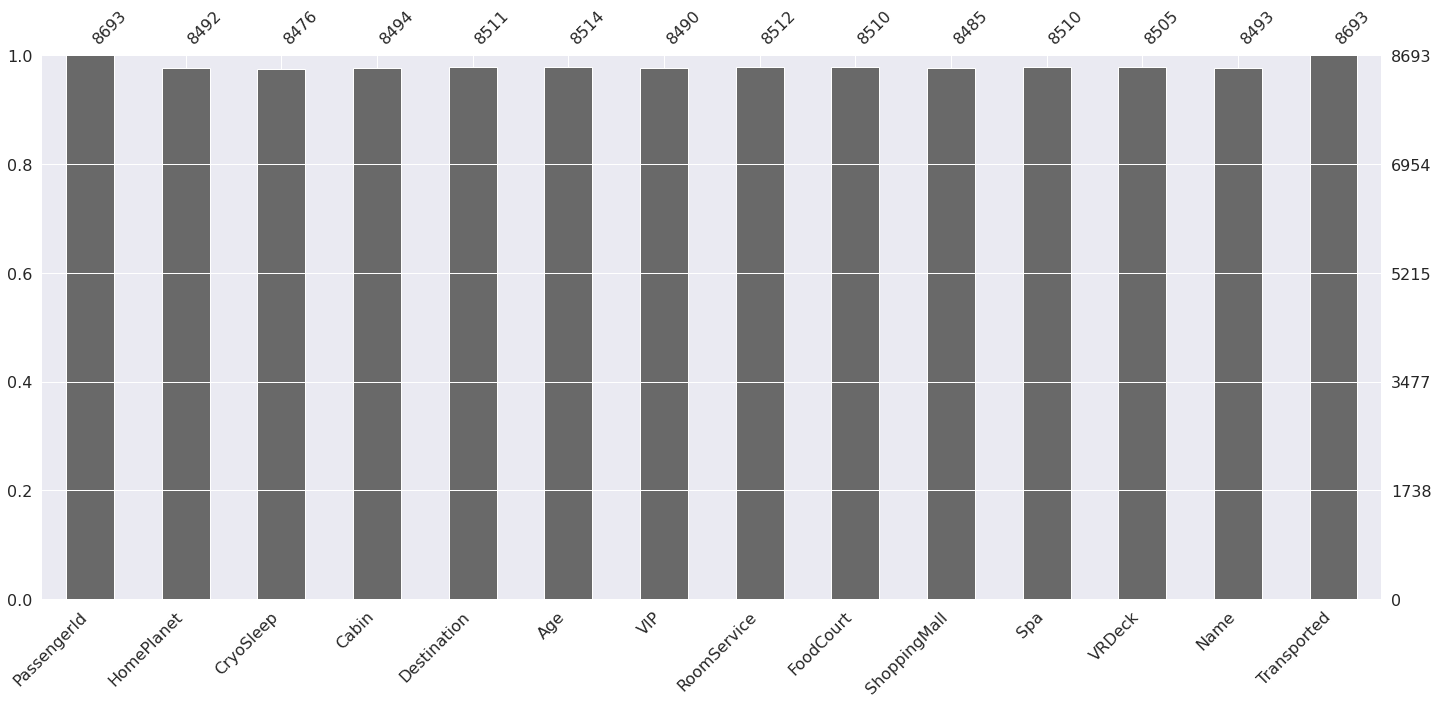

In [8]:
# Almost all values are present at more than 95% capacity
msno.bar(train_df)

<AxesSubplot:>

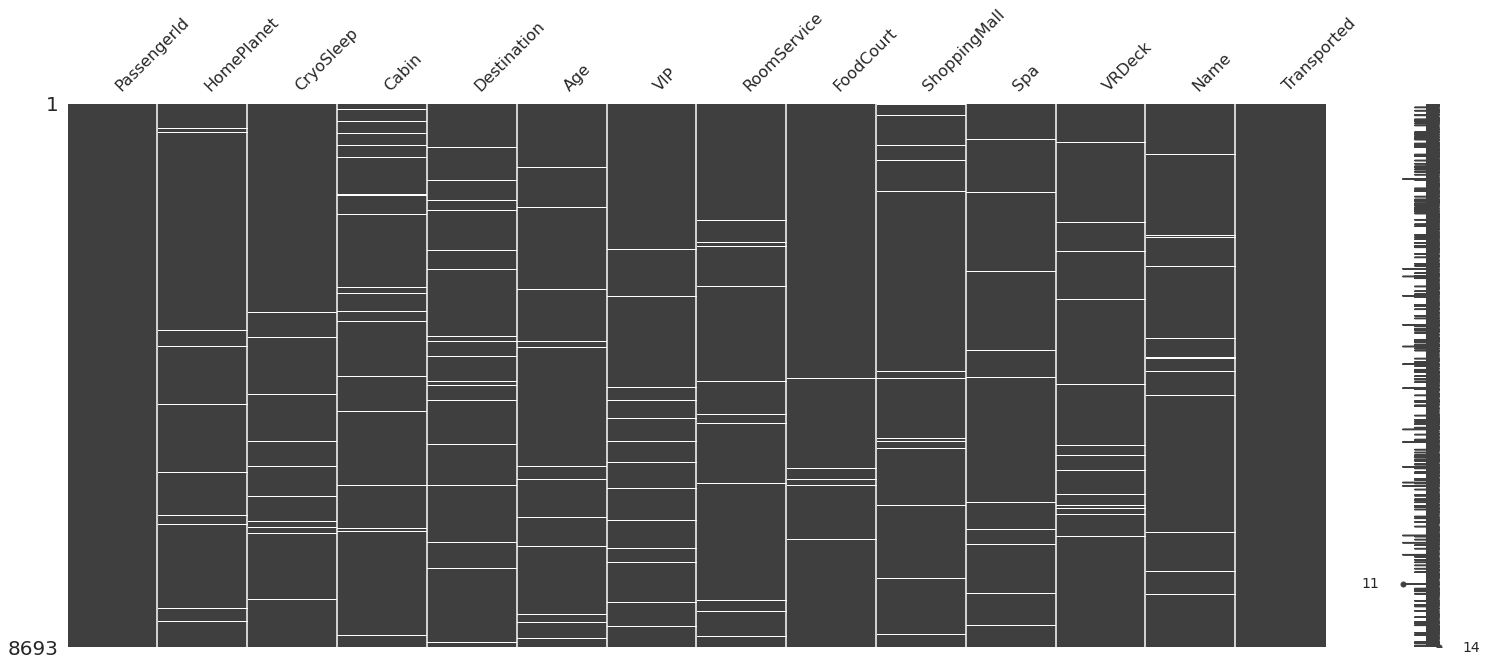

In [9]:
msno.matrix(train_df)

#### Analyze by describing data

In [10]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Most passengers are between the ages of 19-38

#### Data pivoting

Explore the correlation between being VIP and being transported

In [11]:
train_df[['VIP', 'Transported']].groupby(['VIP'], as_index=False).mean().sort_values(by="Transported", ascending=False)

,VIP,Transported
0,False,0.506332
1,True,0.381910


Explore the expected probability of transportation given that a passenger comes from a certain HomePlanet

In [12]:
train_df[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=False).mean().sort_values(by="Transported", ascending=False)

,HomePlanet,Transported
1,Europa,0.658846
2,Mars,0.523024
0,Earth,0.423946


In [13]:
train_df[['CryoSleep', 'Transported']].groupby(['CryoSleep'], as_index=False).mean().sort_values(by="Transported", ascending=False)

,CryoSleep,Transported
1,True,0.817583
0,False,0.328921


**Observation: whether a passenger was in cryo sleep drastically increases the likelihood of being transported**

In [14]:
train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep']].groupby(['CryoSleep'], as_index=False).mean().sort_values(by="CryoSleep")

,CryoSleep,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,False,350.146772,713.004316,270.586504,486.09294,475.716165
1,True,0.000000,0.000000,0.000000,0.00000,0.000000


Those in cryo sleep don't spend any money on luxuries

In [15]:
train_df[['Cabin', 'CryoSleep', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].groupby(['Cabin', 'CryoSleep']).mean()

RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
Cabin   CryoSleep                                                      
A/0/P   False              0.0     2344.0           0.0    65.0  6898.0
        True               0.0        0.0           0.0     0.0     0.0
A/0/S   False             21.5     2429.5         185.5  5022.0   121.0
A/1/S   False            139.5      302.5        1687.0   143.0     1.5
        True               0.0        0.0           0.0     0.0     0.0
...                        ...        ...           ...     ...     ...
G/999/S True               0.0        0.0           0.0     0.0     0.0
T/0/P   False            415.0     1328.0           0.0    14.0    60.0
T/1/P   False              0.0     1829.0           2.0  3133.0  2447.0
T/2/P   False              0.0       28.0           0.0  6841.0   543.0
T/3/P   False              0.0     3135.0           0.0    26.0     3.0

[7062 rows x 5 columns]

#### Analyze through Data Visualization

##### Explore Age distribution across those transported and not transported

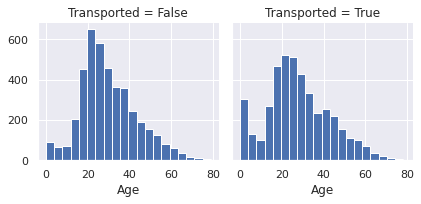

In [16]:
g = sns.FacetGrid(train_df, col='Transported')
g.map(plt.hist, 'Age', bins=20)

The very young are disproportionately transported. The interquartile age range of passengers is between 19-38, which is where a majority of transported passengers are, though more don't get transported than not. The likelihood of getting transported at an old age looks almost like 50/50.

##### Explore Age distribution across planets

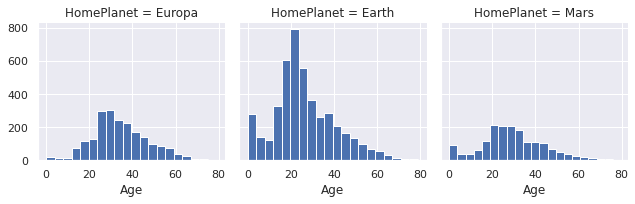

In [17]:
g = sns.FacetGrid(train_df, col="HomePlanet")
g.map(plt.hist, 'Age', bins=20)

In [18]:
train_df[['HomePlanet', 'Age', 'Transported', 'VIP']].groupby(['HomePlanet']).mean()

,Age,Transported
HomePlanet,,
Earth,26.068232,0.423946
Europa,34.419664,0.658846
Mars,29.297203,0.523024


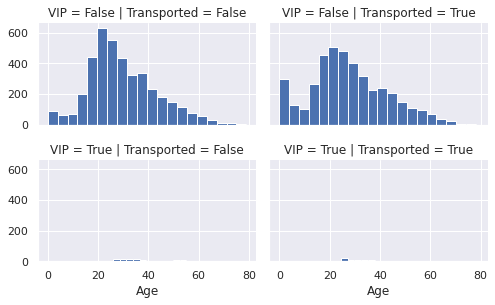

In [19]:
g = sns.FacetGrid(train_df, col='Transported', row='VIP', height=2.2, aspect=1.6)
g.map(plt.hist, 'Age', bins=20)

In [20]:
train_df.loc[train_df['VIP'] == True].count()

PassengerId     199
HomePlanet      194
CryoSleep       196
Cabin           193
Destination     197
Age             198
VIP             199
RoomService     195
FoodCourt       193
ShoppingMall    194
Spa             197
VRDeck          195
Name            196
Transported     199
dtype: int64

Check if the names have any titles

In [21]:
titles = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
titles.unique()

array([nan], dtype=object)

No titles have been found

In [22]:
train_df.loc[train_df['CryoSleep'] == True, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].value_counts()

RoomService  FoodCourt  ShoppingMall  Spa  VRDeck
0.0          0.0        0.0           0.0  0.0       2690
dtype: int64

If you're in CryoSleep, you'll never spend any money on luxuries.

In [23]:
train_df.loc[train_df['CryoSleep'] == False, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...
8686,1.0,1146.0,0.0,50.0,34.0
8688,0.0,6819.0,0.0,1643.0,74.0
8690,0.0,0.0,1872.0,1.0,0.0
8691,0.0,1049.0,0.0,353.0,3235.0


470 of those awake don't spend money on luxuries, while 2690 of those asleep don't spend money on luxuries.

In [24]:
470/(470 + 2690), 2690/(470 + 2690)

(0.14873417721518986, 0.8512658227848101)

## Data Wrangling

Drop Rows with Missing Names and make FirstName and LastName columns

In [25]:
# for df in datasets:
#     df['Name'] = df.loc[df['Name'].notna(), 'Name']
#     name_info = df['Name'].str.split()
#     name_info = name_info.str
#     df['FirstName'] = name_info[0]
#     df['LastName'] = name_info[1]

Make GroupId and MemberId columns

In [26]:
# for df in datasets:
#     info = df['PassengerId'].str.extract(r"(\d{4})_(\d{2})")
#     df['GroupId'] = info[0]
#     df['MemberId'] = info[1]

In [27]:
# train_df['LastName'].value_counts()

#### Drop Name

In [28]:
for df in datasets:
    df.drop(['Name'], axis=1, inplace=True)

**Drop passengerId from train_df**

In [29]:
train_df.drop(['PassengerId'], axis=1, inplace=True)
train_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [30]:
datasets[0].head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


#### Make MoneySpent column


In [31]:
for df in datasets:
    df['MoneySpent'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck'] 
    # CryoSleepers don't spend money
    df.loc[(df['MoneySpent'].isnull()) & (df['CryoSleep'] == True), "MoneySpent"] = 0
    # Rest of NaN cases are awake
    df['MoneySpent'].fillna(df['MoneySpent'].dropna().median(), inplace=True)
    # Assume those who didn't spend money to be asleep
    df.loc[(df['CryoSleep'].isnull()) & (df['MoneySpent'] == 0), "CryoSleep"] = True
    df.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1, inplace=True)

#### Converting and completing the Cabin feature

In [32]:
train_df[['Cabin']].tail()

,Cabin
8688,A/98/P
8689,G/1499/S
8690,G/1500/S
8691,E/608/S
8692,E/608/S


Split up Cabin Data into parts and convert categorical parts into numerical

In [33]:
le = LabelEncoder()

# Fill with modes
for df in datasets:
    cabin = df['Cabin'].str.extract(r"([A-Z])\/(\d+)\/([PS])")
    cabin[0] = le.fit_transform(cabin[0])
    cabin[0].fillna(cabin[0].dropna().mode()[0], inplace=True)
    cabin[1].fillna(cabin[1].dropna().mode()[0], inplace=True)
    cabin[2] = le.fit_transform(cabin[2])
    cabin[2].fillna(cabin[2].dropna().mode()[0], inplace=True)
    df['Deck'] = cabin[0]
    df['Num'] = cabin[1].astype(int)
    df['Side'] = cabin[2]
print(train_df['Deck'].dtype, train_df['Num'].dtype, train_df['Side'].dtype)
train_df[['Deck', 'Num', 'Side']]

int64 int64 int64


,Deck,Num,Side
0,1,0,0
1,5,0,1
2,0,0,1
3,0,0,1
4,5,1,1
...,...,...,...
8688,0,98,0
8689,6,1499,1
8690,6,1500,1
8691,4,608,1


We can now drop the cabin feature

In [34]:
for df in datasets:
    df.drop(['Cabin'], axis=1, inplace=True)

#### Some visualization based on new Cabin data

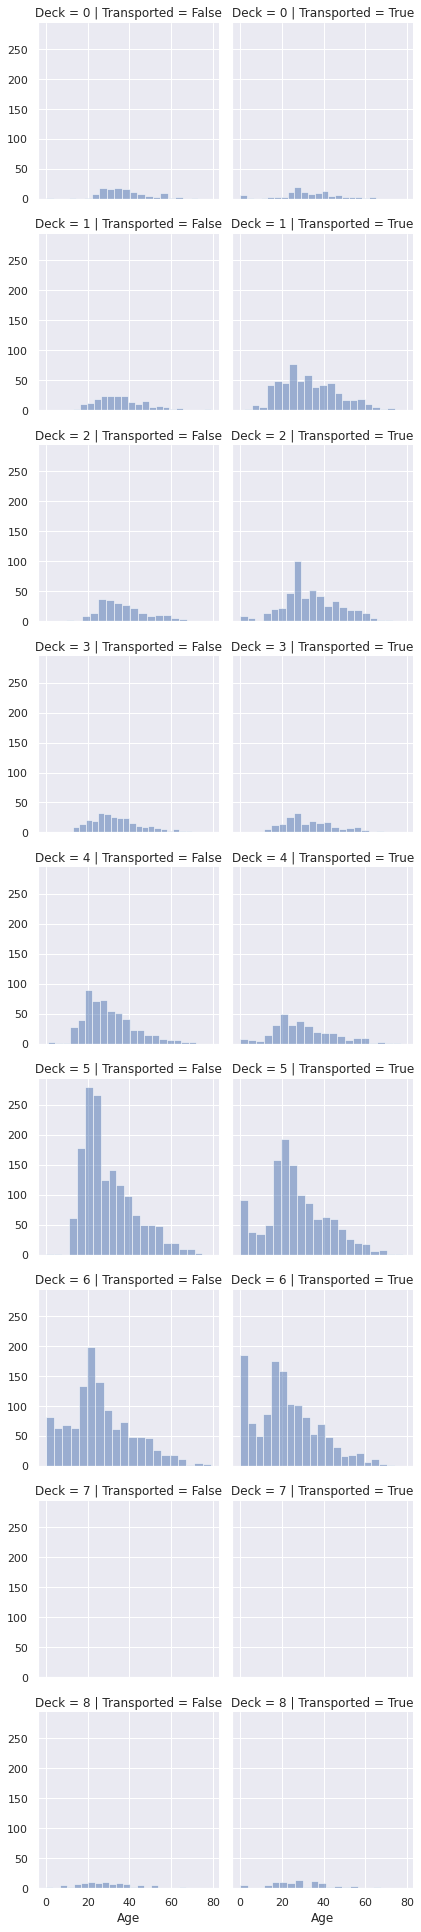

In [35]:
g = sns.FacetGrid(train_df, col="Transported", row="Deck")
g.map(plt.hist, 'Age', alpha=0.5, bins=20)

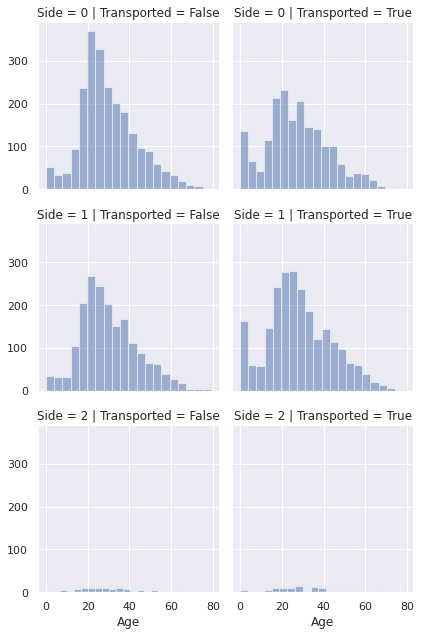

In [36]:
g = sns.FacetGrid(train_df, col="Transported", row="Side")
g.map(plt.hist, 'Age', alpha=0.5, bins=20)

#### Completing and converting the HomePlanet Feature

In [37]:
le = LabelEncoder()
# Complete with Mode
for df in datasets:
    df['HomePlanet'].fillna(df['HomePlanet'].dropna().mode()[0], inplace=True)
    df['HomePlanet'] = le.fit_transform(df['HomePlanet'])

#### Completing and converting the Destination feature

In [38]:
le = LabelEncoder()
for df in datasets:
    df['Destination'].fillna(df['Destination'].dropna().mode()[0], inplace=True)
    df['Destination'] = le.fit_transform(df['Destination'])

#### Completing and converting the VIP feature

In [39]:
# Use the mode, which is VIP=False
le = LabelEncoder()
for df in datasets:
    df['VIP'].fillna(df['Destination'].dropna().mode()[0], inplace=True)
    df['VIP'] = le.fit_transform(df['VIP'])

#### Completing and converting the CryoSleep feature

In [40]:
le = LabelEncoder()
for df in datasets:
    df['CryoSleep'].fillna(df['CryoSleep'].dropna().mode()[0], inplace=True)

#### Completing the Age feature

In [41]:
# Use overall median
# Might want to use median for each HomePlanet
# or some combination of given parameters
for df in datasets:
    df['Age'].fillna(df['Age'].dropna().median(), inplace=True)

#### Make AgeBand Column

In [42]:
for df in datasets:
    df['AgeBand'] = pd.cut(df['Age'], 20, labels=range(0, 20))

We can now drop the AgeBand column

In [43]:
for df in datasets:
    df['Age'] = df['AgeBand']
    df.drop(['AgeBand'], axis=1, inplace=True)
train_df[['Age', 'Transported']].groupby(['Age'], as_index=False).mean().sort_values(by="Age", ascending=True)

,Age,Transported
0,0,0.772152
1,1,0.653061
2,2,0.586207
3,3,0.566316
4,4,0.508715
5,5,0.445773
6,6,0.472899
7,7,0.484127
8,8,0.481322
9,9,0.452599


#### Further exploration based on new columns

In [44]:
train_df[['Age', 'MoneySpent', 'Deck', 'Side', 'Transported']].groupby(['Deck']).mean()

,MoneySpent,Side,Transported
Deck,,,
0,3266.675781,0.542969,0.496094
1,2805.052632,0.546855,0.734275
2,3807.199465,0.543507,0.680054
3,2169.541841,0.481172,0.433054
4,1236.468037,0.510274,0.357306
5,954.036865,0.485326,0.439871
6,379.765143,0.501368,0.516217
7,4101.800000,0.200000,0.200000
8,1556.035176,2.000000,0.502513


In [45]:
train_df[['Age', 'MoneySpent', 'Deck', 'Side', 'Transported']].groupby(['Deck', 'Side']).mean()

MoneySpent  Transported
Deck Side                          
0    0     3286.589744     0.435897
     1     3249.913669     0.546763
1    0     3119.441926     0.674221
     1     2544.537559     0.784038
2    0     3781.932551     0.580645
     1     3828.421182     0.763547
3    0     2099.056452     0.403226
     1     2245.543478     0.465217
4    0     1210.452214     0.342657
     1     1261.436242     0.371365
5    0      946.684979     0.410987
     1      961.833333     0.470501
6    0      404.053292     0.448276
     1      355.609509     0.583788
7    0     4951.000000     0.250000
     1      705.000000     0.000000
8    2     1556.035176     0.502513

In [46]:
# train_df[['HomePlanet', 'Destination', 'Age', 'VIP', 'MoneySpent', 'Transported']].groupby(['HomePlanet', 'Destination', 'VIP']).mean().sort_values(by='MoneySpent', ascending=False)

In [47]:
train_df.describe()

,HomePlanet,Destination,VIP,MoneySpent,Deck,Num,Side
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.649833,1.494306,0.069596,1375.029104,4.389969,588.501208,0.539054
std,0.795183,0.814966,0.333871,2713.884609,1.842573,511.879432,0.542487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,3.000000,152.000000,0.000000
50%,0.000000,2.000000,0.000000,705.000000,5.000000,407.000000,1.000000
75%,1.000000,2.000000,0.000000,1299.000000,6.000000,983.000000,1.000000
max,2.000000,2.000000,2.000000,35987.000000,8.000000,1894.000000,2.000000


## Model, Predict, and Solve
Models to be used:
- Random Forest
- Decision Tree
- Support Vector Machine
- Linear Support Vector Machine
- K-Nearest Neighbor
- Naive Bayes
- Logistic Regression
- RVM or Relevance Vector Machines
- Perceptron
- Multi-layer Perceptron

In [48]:
X_train = train_df.drop("Transported", axis=1)
y_train = train_df['Transported']
X_test = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, y_train.shape, X_test.shape

((8693, 9), (8693,), (4277, 9))

In [49]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


60.54

In [50]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X

72.28

In [51]:
# Logistic Regression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


72.5

In [52]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


51.1

In [53]:
# Multi-layer Perceptron
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)

acc_mlp = round(mlp.score(X_train, y_train) * 100, 2)
acc_mlp

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


73.43

In [54]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


73.38

In [55]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Destination,2.120260
8,Side,0.597233
0,CryoSleep,0.153432
7,Num,0.000286
5,MoneySpent,-0.000085
4,Transported,-0.029699
3,VIP,-0.041709
2,Age,-0.147537
6,Deck,-0.257032


In [56]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

99.68

In [57]:
# K-Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X

75.35

In [58]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

99.68

In [59]:
# Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

73.52

In [61]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Multi-Layer Perceptron'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree, acc_mlp]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,99.68
8,Decision Tree,99.68
1,KNN,75.35
0,Support Vector Machines,73.52
9,Multi-Layer Perceptron,73.43
6,Stochastic Gradient Decent,73.38
2,Logistic Regression,72.50
4,Naive Bayes,72.28
7,Linear SVC,60.54
5,Perceptron,51.10


In [62]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Transported": y_pred
    })

filename = 'submission.csv'
submission.to_csv(f'/kaggle/working/{filename}', index=False)